In [27]:
# Standard python numerical analysis imports:
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz
import h5py
import json
import os
import urllib2

# the IPython magic below must be commented out in the .py file, since it doesn't work there.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [28]:
try: os.mkdir('./data')
except: pass

# -- Handy function to download data file, and return the filename
def download(url):
    filename = os.path.join('data', url.split('/')[-1])
    print('Downloading ' + url )
    r = urllib2.urlopen(url).read()
    f = open(filename, 'w')   # write it to the right filename
    f.write(r)
    f.close()
    print("File download complete")
    return filename

In [29]:
url = 'https://losc.ligo.org/s/events/GW150914/P150914/fig2-unfiltered-template-reconstruction-H.txt'
template = download(url)

url = 'https://losc.ligo.org/s/events/GW150914/P150914/fig2-unfiltered-waveform-H.txt'
nr = download(url)

File download complete
File download complete


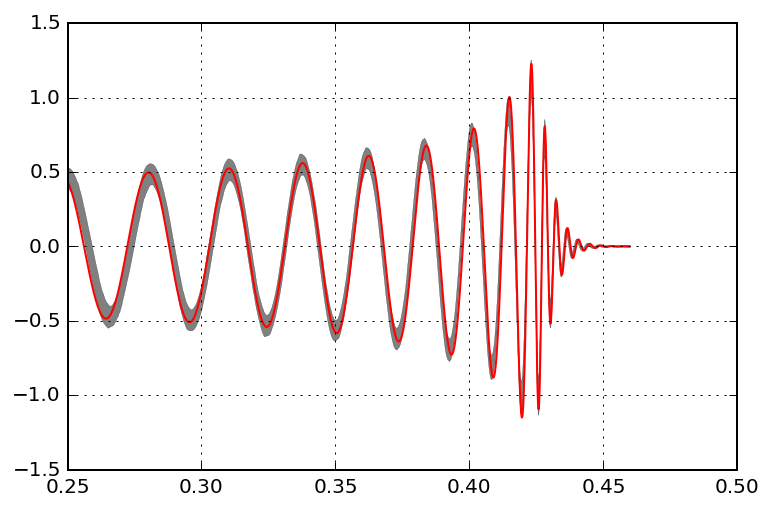

In [30]:
time, low, high = np.recfromtxt(template, unpack='True')
time_nr, h_nr = np.recfromtxt(nr, unpack='True')

plt.fill_between(time, low, high, facecolor='gray', linewidth=0.1)
plt.plot(time_nr, h_nr, 'r')
plt.grid()